# Week 13 - Sparse Kernel Machines

Learning contents:

* Support Vector Machine
    * Fit a linear SVM classifier, and plot the decision boundary, margin, and support vectors
    * Fit a non-linear SVM classifier using the RBF kernel, and plot the decision boundary, margin, and support vectors
    * Compare C=1 with C=1000 on the RBF-kernel SVM-classifier. What is the effect of a larger C? What could be the downside of a very large C?

In [2]:
# Dependencies
import numpy as np
import scipy
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_palette('bright')

# 1) Support Vector Machines
As usual, we'll be working with a dataset of handwritten digits.
Let visualise some examples.

In [4]:
# We're using a subset of two classes
digits = load_digits(n_class=2)

In [5]:
# We can get a 2D version of the data using PCA
pca = PCA(n_components=2)
t = 2* digits.target -1 # {-1,1}
X = pca.fit_transform(digits.data)

# In order to get a non-linearly seperable case,
# we'll modify the data a bit this time,
# translating the '-1' class to the right
X = np.where(
    np.repeat(np.expand_dims(t == 1, axis=1), 2, axis=1),
    X,
    np.vstack([X[:,0]+15, X[:,1]]).T
)

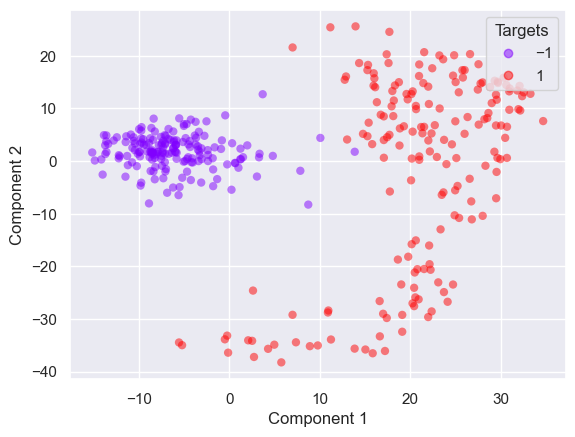

In [6]:
# Let's plot all the data in 2D
def plot_scatter(data, target, alpha=0.5, legend=True):
    scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap='rainbow')
    if legend:
        plt.legend(*scatter.legend_elements(), loc="upper right", title="Targets")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

plot_scatter(X, t)

## 1.1) Fit a linear SVM classifier, and plot the decision boundary, margin, and support vectors
_Hint: use the SVM classifier from scikit-learn. The default C=1 will do just fine_

In [7]:
from sklearn.svm import SVC

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Courtesy of https://jakevdp.github.io/PythonDataScienceHandbook/"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=200, linewidth=1, edgecolors='black', facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [8]:
# Implement SVC classifier with linear kernel from scikit-learn
svc_linear = SVC(kernel='linear', C=1)
svc_linear.fit(X, t)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


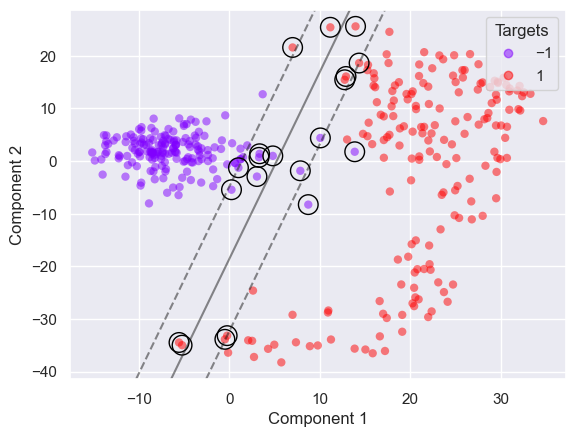

In [9]:
# Plot the SVC classifier

plot_scatter(X, t)
plot_svc_decision_function(svc_linear)

## 1.2) Fit a non-linear SVM classifier using the RBF kernel, and plot the decision boundary, margin, and support vectors

_Hint: use the SVM classifier from scikit-learn. The default C=1 will do just fine_

In [10]:
# Implement SVC classifier with rbf kernel from scikit-learn
svc_rbf = SVC(kernel='rbf', C=1)
svc_rbf.fit(X, t)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


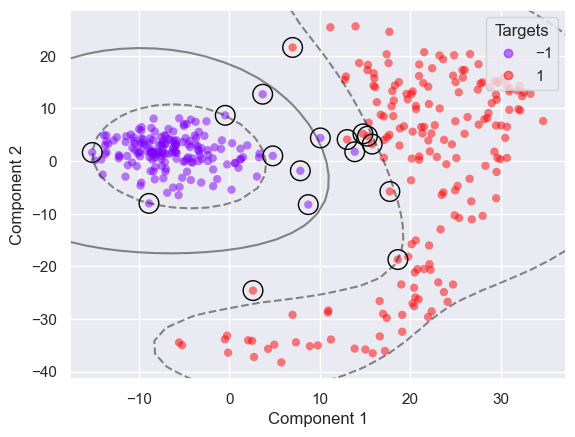

In [11]:
# Plot the SVC classifier

plot_scatter(X, t)
plot_svc_decision_function(svc_rbf)

## 1.3) Compare C=1 with C=1000 on the RBF-kernel SVM-classifier. What is the effect of a larger C? What could be the downside of a very large C?

In [12]:
# Implement SVC classifier with rbf kernel from scikit-learn with C= 1000
svc_rbf_c1000 = SVC(kernel='rbf', C=1000)
svc_rbf_c1000.fit(X, t)

,C,1000
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


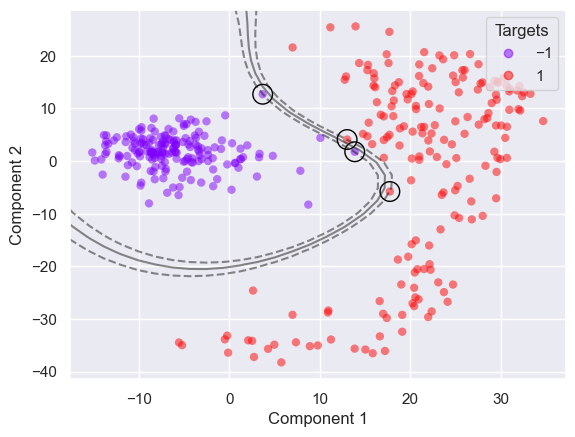

In [13]:
# Plot the SVC classifier

plot_scatter(X, t)
plot_svc_decision_function(svc_rbf_c1000)